## Project Instructions

In this project, you will use regression models to predict the number of days a customer rents DVDs for.

As with most data science projects, you will need to pre-process the data provided, in this case, a csv file called rental_info.csv. 

Specifically, you need to:

- Read in the csv file rental_info.csv using pandas.
- Create a column named "rental_length_days" using the columns "return_date" and "rental_date", and add it to the pandas DataFrame. This column should contain information on how many days a DVD has been rented by a customer.
- Create two columns of dummy variables from "special_features", which takes the value of 1 when:
    - The value is "Deleted Scenes", storing as a column called "deleted_scenes".
    - The value is "Behind the Scenes", storing as a column called "behind_the_scenes".
- Make a pandas DataFrame called X containing all the appropriate features you can use to run the regression models, avoiding columns that leak data about the target.
- Choose the "rental_length_days" as the target column and save it as a pandas Series called y.

 Following the preprocessing you will need to:

1. Split the data into X_train, y_train, X_test, and y_test train and test sets, avoiding any features that leak data about the target variable, and include 20% of the total data in the test set.
1. Set random_state to 9 whenever you use a function/method involving randomness, for example, when doing a test-train split.
1. Recommend a model yielding a mean squared error (MSE) less than 3 on the test set

1. Save the model you would recommend as a variable named best_model, and save its MSE on the test set as best_mse.

In [63]:
# Importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor


In [64]:
# reading CSV file
rental_data = pd.read_csv('/Users/karolk/Python_Work/DataCamp/Datasets/DVD_rental/rental_info.csv')

# checking the first few rows of the dataframe
rental_data.head()


,rental_date,return_date,amount,release_year,rental_rate,length,replacement_cost,special_features,NC-17,PG,PG-13,R,amount_2,length_2,rental_rate_2
0,2005-05-25 02:54:33+00:00,2005-05-28 23:40:33+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401
1,2005-06-15 23:19:16+00:00,2005-06-18 19:24:16+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401
2,2005-07-10 04:27:45+00:00,2005-07-17 10:11:45+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401
3,2005-07-31 12:06:41+00:00,2005-08-02 14:30:41+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401
4,2005-08-19 12:30:04+00:00,2005-08-23 13:35:04+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401


In [65]:
# converting the date columns to datetime
rental_data['rental_date'] = pd.to_datetime(rental_data['rental_date'])
rental_data['return_date'] = pd.to_datetime(rental_data['return_date'])

# creating a new column with the rental length. The coulmn will be the difference between the return and rental date in number of days
rental_data['rental_length_days'] = (rental_data['return_date'] - rental_data['rental_date']).dt.days


In [66]:
# create variable called “behind_the_scenes” and set it to 1 if the “special_features” column contains “Behind the Scenes” and 0 otherwise
rental_data['behind_the_scenes'] = rental_data['special_features'].apply(lambda x: 1 if 'Behind the Scenes' in x else 0)

# create variable called “deleted_scenes” and set it to 1 if the “special_features” column contains “Deleted Scenes” and 0 otherwise
rental_data['deleted_scenes'] = rental_data['special_features'].apply(lambda x: 1 if 'Deleted Scenes' in x else 0)
                                                                      
                                                                      
            

In [67]:
# create a new dataframe with the appropriate features by defining the columns to drop
columns_to_drop = ['rental_date', 'return_date', 'special_features','rental_length_days']

# create a new dataframe with the appropriate features
X = rental_data.drop(columns_to_drop, axis=1)

# create a pandas Series called y containing the target variable
y = rental_data['rental_length_days']

In [68]:
# split dataset into training and test sets for X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

In [69]:
# create a linear regression model and measure the mean squared error on the test set
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(mse)

# view the model's r squared value
print(linear_model.score(X_test, y_test))


2.9417238646975705
0.5856476313096747


In [70]:
# create a lasso regression model and test which alpha level yields the lowest MSE. Testing following alpha levels: 0.01, 1, 10, 20, 50, 100
alphas = [0.001, 0.01, 0.5, 1, 2, 5]
for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=100000)
    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(alpha, mse)

0.001 2.9419638702781645
0.01 2.950251383509053
0.5 3.7137682414670494
1 3.8056884092652106
2 3.8761606076237856
5 4.402549087126509


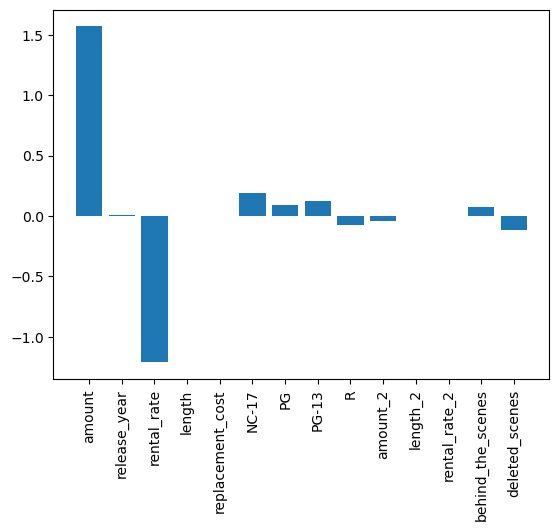

In [71]:
# using lasso regression model with alpha = 0.001 show which features should be selected
names = X.columns
lasso = Lasso(alpha=0.001)
lasso_coef = lasso.fit(X, y).coef_
plt.bar(names, lasso_coef)
plt.xticks(rotation=90)
plt.show()

In [72]:

# choose only the features that are not equal to 0 in the lasso regression model
best_features = names[lasso_coef != 0]

# create a new dataframe with the best features
X_lasso = X[best_features]

# run linear regression model on the best features and measure the mean squared error on the test set
X_train, X_test, y_train, y_test = train_test_split(X_lasso, y, test_size=0.2, random_state=9)
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)
best_mse = mean_squared_error(y_test, y_pred)
print(best_mse)

# print the r squared value
print(linear_model.score(X_test, y_test))

2.9417238646975705
0.5856476313096747


In [74]:
# fit randometree regressor model
rf = RandomForestRegressor(n_estimators=50, max_depth=30, min_samples_leaf=1, min_samples_split=2, random_state=9)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
best_mse = mean_squared_error(y_test, y_pred)
print(best_mse)

# print the r squared value
print(rf.score(X_test, y_test))

# save the model and its mse
best_model = rf 
best_mse = best_mse


2.0358133356408072
0.7132483820262161


In [ ]:
# fine tuning the RandomTree Regressor model
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [10, 20, 50],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize a GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=9), param_grid=param_grid, scoring='neg_mean_squared_error', cv=3, n_jobs=-1, verbose=2)

# Fit the GridSearchCV object on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best score: {best_score}")